Here we analyse the possibility of replacing the pulsed laser by a CW one, while retaining the method presented by Jakob et al. and its SNR improvements.  

## Original Data Processing, and Role of the Pulsed Laser 

Temporal Gating: Photon occurences are collapsed within one cycle of the pulsed laser (80 Mhz -> 12.5 ns). This results in a histogram with most photons arriving inside a 200ps window. Timestamps outside of this window are attributed to dark counts and noise. 

This temporal reconstruction is applicable to any periodic signal in an experiment. In their preliminary result, they apply it to the pulsed laser itself which results in fig. 5(c). 

They also apply the concept to the modulation signal (provided by an EOM here). The result is fig. 5(d), a reconstruction of the laser modulation cycle. 

Using a CW laser, we lose 5(c), but retain 5(d) through our modulation. 

They reduce the power of the laser to obtain fig. 6(a), then dark counts outside of the 200ps window in 5(c) are removed, resulting in 6(b), with the count rate outside the laser window reduced to close to 0 -> 400% increase in modulation visibility. 

It seems like we couldn't achieve this with a DC source, since no way to generate something like 5(c).

Let's try to quantify the difference in improvement, DC vs. Pulsed, using Jakob's method. Hopefully it still beats traditional lock-in. 

We're able to discriminate between noise and signal using times of arrival: anything outside the window is to be discarded. 
Is there another characteristic we could use to perform this discrimination? Frequency? 

#### Simulation 1: Pulsed Laser + Modulation (Stokes Scattering)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [14]:
# synthetic data
# 3 lists of timestamps are collected: laser pulses, modulation pulses, photon detections 

# laser pulses: avg 79.64 MHz, std dev 25 kHz  
f_rep = 1.00001e3 # s-1
std_f_rep = 0.78e-3 # s-1

T_rep = 1 / f_rep # s
std_T_rep = 1 / std_f_rep # s

count_rate = 10e2 # cts/s
integration_time = 100 # s

Text(0.5, 0, 'Frequency')

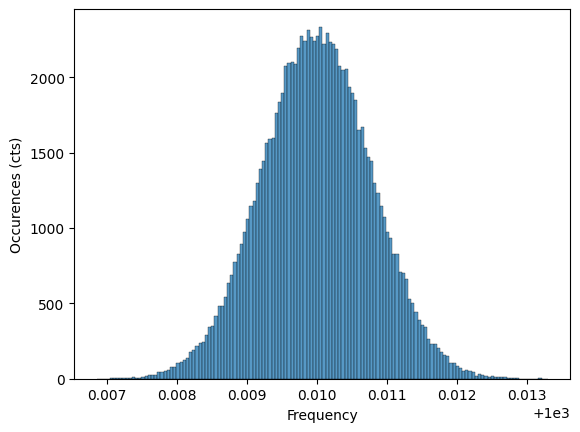

In [ ]:
# histogram of the clock frequency for the laser pulses
frequencies = np.random.normal(f_rep, std_f_rep, size=int(count_rate * integration_time))


sns.histplot(frequencies)
plt.ylabel("Occurences (cts)")
plt.xlabel("Frequency")

In [19]:
print(f"Integration Time: {integration_time}s. Counted Photons: {len(frequencies)}")

Integration Time: 100s. Counted Photons: 100000


In [ ]:
# create photon arrival timestamps
# [0, 100], 100k in total, ps precision 